In [303]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [304]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [305]:
df = pd.read_csv('who_life_exp.csv')
df.head()

country country_code  region  year  life_expect  life_exp60  \
0  Angola          AGO  Africa  2000     47.33730    14.73400   
1  Angola          AGO  Africa  2001     48.19789    14.95963   
2  Angola          AGO  Africa  2002     49.42569    15.20010   
3  Angola          AGO  Africa  2003     50.50266    15.39144   
4  Angola          AGO  Africa  2004     51.52863    15.56860   

   adult_mortality  infant_mort  age1-4mort  alcohol  ...  che_gdp    une_pop  \
0         383.5583     0.137985    0.025695  1.47439  ...  1.90860  16395.473   
1         372.3876     0.133675    0.024500  1.94025  ...  4.48352  16945.753   
2         354.5147     0.128320    0.023260  2.07512  ...  3.32946  17519.417   
3         343.2169     0.122040    0.021925  2.20275  ...  3.54797  18121.479   
4         333.8711     0.115700    0.020545  2.41274  ...  3.96720  18758.145   

   une_infant  une_life  une_hiv  une_gni  une_poverty  une_edu_spend  \
0       122.2    46.522      1.0   2530.0         32.3        2.60753   
1       118.9    47.059      1.1   2630.0          NaN            NaN   
2       115.1    47.702      1.2   3180.0          NaN            NaN   
3       110.8    48.440      1.3   3260.0          NaN            NaN   
4       106.2    49.263      1.3   3560.0          NaN            NaN   

   une_literacy  une_school  
0           NaN         NaN  
1      67.40542         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  

[5 rows x 32 columns]

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [307]:
df.isna().sum()

country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
hospitals          2981
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_literacy       2540
une_school         2306
dtype: int64

We decided to drop hostpital column because there is 96% of missing values in that column.
We decided to drop the UNESCO datasets because there are overlapping predictors with the predictors in GHO datasets. Another reason we choose GHO datasets over UNESCO datasets is because some of the variables in UNESCO has more than 70% null data, eg une_poverty, une_edu_spend, une_literacy, une_school. However, we retained une_pop and une_hiv because these two variables are not found in GHO datasets.


In [308]:
df.drop(['une_infant', 'une_life', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school'], 
        axis = 1, inplace = True)

We decided to drop 'hostpital' column because there is 96% of missing values in that column. 
We also dropped 'country code' column because 'country' column itself is enough for reference.

In [309]:
df.drop(['hospitals'], axis = 1, inplace = True)
df.drop(['country_code'], axis = 1, inplace =True)

In [310]:
mortality = pd.DataFrame(df[['adult_mortality', 'infant_mort', 'age1-4mort']])
mortality.head()

adult_mortality  infant_mort  age1-4mort
0         383.5583     0.137985    0.025695
1         372.3876     0.133675    0.024500
2         354.5147     0.128320    0.023260
3         343.2169     0.122040    0.021925
4         333.8711     0.115700    0.020545

The values of adult mortality are rate per 1000 populations thus we convert it into the same format as the other two mortality rate in order to ease the EDA.

In [311]:
for i in range(0, 3111):
    val = df.iloc[i]['adult_mortality']
    adjusted_val = val/1000 
    df.at[i, 'adult_mortality'] = adjusted_val

In [312]:
df.rename(columns = {'adult_mortality':'adult_mort_rate', 'infant_mort':'infant_mort_rate', 'age1-4mort':'age1-4_mort_rate'}, 
          inplace = True)

In [313]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               50
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Checking missing values under 'alcohol' column

In [314]:
df[df['alcohol'].isna()]['country'].value_counts()

South Sudan    17
Sudan          11
Serbia          6
Montenegro      6
Afghanistan     5
Canada          5
Name: country, dtype: int64

In [315]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])

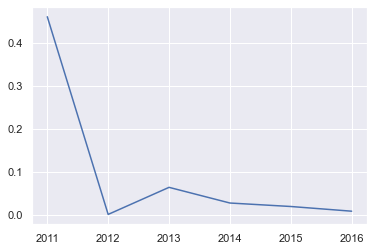

In [316]:
plt.plot('year', 'alcohol', data = sudan_df)

In [317]:
sudan_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

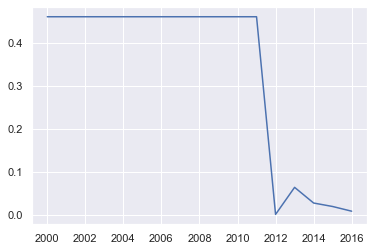

In [318]:
plt.plot('year', 'alcohol', data = sudan_df)

In [319]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])

In [320]:
sudan_df.bfill(inplace = True)

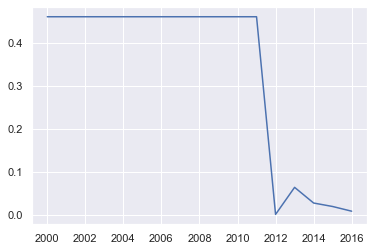

In [321]:
plt.plot('year', 'alcohol', data = sudan_df)

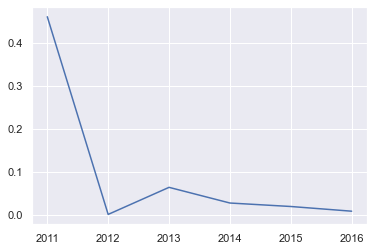

In [322]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])
sudan_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = sudan_df)

In [323]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])

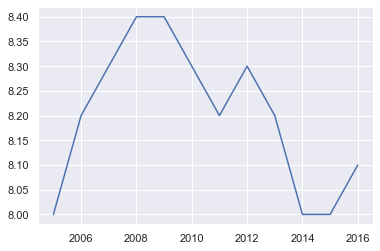

In [324]:
plt.plot('year', 'alcohol', data = canada_df)

In [325]:
canada_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

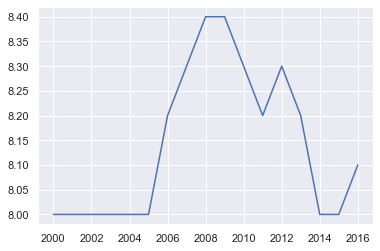

In [326]:
plt.plot('year', 'alcohol', data = canada_df)

In [327]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])

In [328]:
canada_df.ffill(inplace = True)

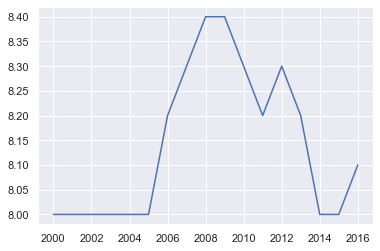

In [329]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

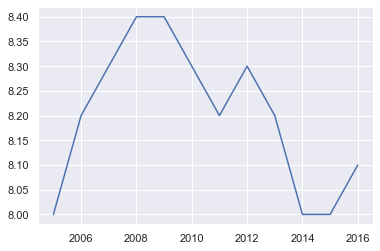

In [330]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

In [331]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])

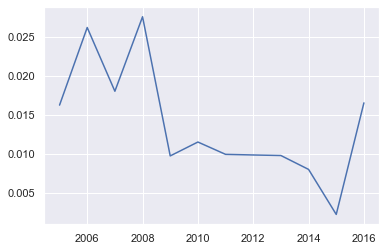

In [332]:
plt.plot('year', 'alcohol', data = afg_df)

In [333]:
afg_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

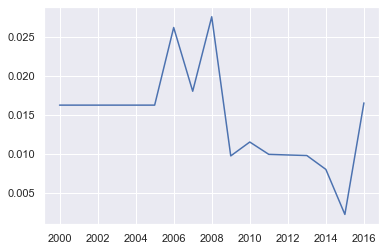

In [334]:
plt.plot('year', 'alcohol', data = afg_df)

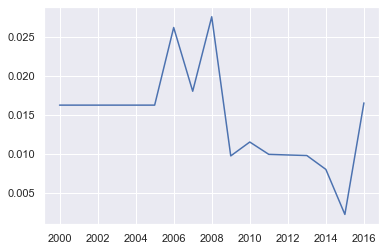

In [335]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

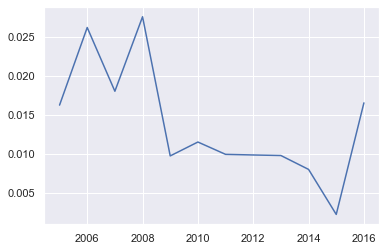

In [336]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

Analysis : It is obvious that no trend can be observed from the above plot as the years given to observe the trend of the data are too few and also the missing values are usually appear to be missing in consecutive years. In addition to this, we realisedt that forward filling is not working in this case and this indicates that backward filling might also not working for other cases. Thus, interpolation with linear method and both directin will be the better method to fill in the missing values as it is able to fill in missing values which appears to be in the recent years or in the earliest year. Furthermore, if the missing values are more than 10 for a country, we tend not to fill in the null values as too few of available datas to be used as reference for filling in the missing values and might contribute to low accuracy. 

In [337]:
countries = df[df['alcohol'].isna()]['country'].unique().tolist()

In [338]:
for country in countries:
    if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc('alcohol')
        alcohol_df = pd.DataFrame(df.iloc[row_index, col_index])
        alcohol_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = alcohol_df

<ipython-input-338-ba402bbb7128>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:


In [339]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               28
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Define a method to fill the null values with the condition that if missing values for one country are more than 10 then the null values will be retained

In [340]:
def fill_na(pred, country):
    if len(df[df[pred].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc(pred)
        pred_df = pd.DataFrame(df.iloc[row_index, col_index])
        pred_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = pred_df

In [341]:
df[df['bmi'].isna()]['country'].value_counts()

Sudan          17
South Sudan    17
Name: country, dtype: int64

In [342]:
df[df['age5-19thinness'].isna()]['country'].value_counts()

Sudan          17
South Sudan    17
Name: country, dtype: int64

In [343]:
df[df['age5-19obesity'].isna()]['country'].value_counts()

Sudan          17
South Sudan    17
Name: country, dtype: int64

To check if the fill_na method works well on other datasets as well.

In [344]:
null_df = pd.DataFrame(df[df['hepatitis'].isna()]['country'].value_counts())
pd.set_option('display.max_rows',null_df.shape[0]+1)
print(null_df)


                                                    country
Finland                                                  17
Norway                                                   17
United Kingdom of Great Britain and Northern Ir...       17
Hungary                                                  17
Japan                                                    17
Switzerland                                              17
Denmark                                                  17
Slovenia                                                 17
Iceland                                                  17
South Sudan                                              15
Equatorial Guinea                                        14
Haiti                                                    13
Somalia                                                  13
Sweden                                                   11
Netherlands                                              11
Namibia                                 

In [345]:
aus_df = pd.DataFrame(df[df['country'] == 'Australia'])

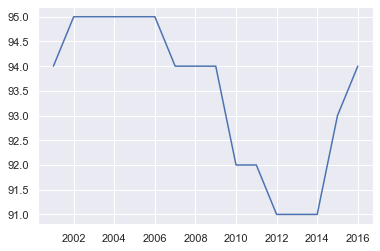

In [346]:
plt.plot('year', 'hepatitis', data = aus_df)

In [347]:
aus_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

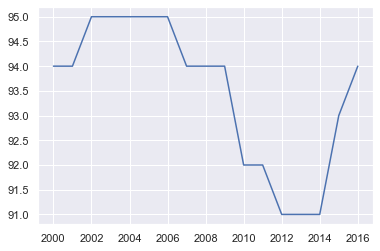

In [348]:
plt.plot('year', 'hepatitis', data = aus_df)

In [349]:
pnm_df = pd.DataFrame(df[df['country'] == 'Panama'])

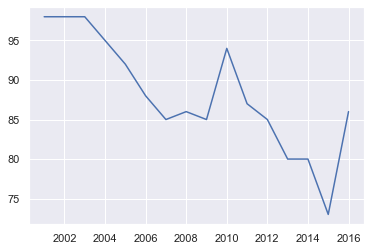

In [350]:
plt.plot('year', 'hepatitis', data = pnm_df)

In [351]:
pnm_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

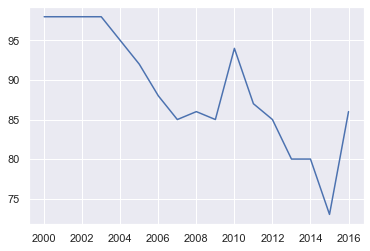

In [352]:
plt.plot('year', 'hepatitis', data = pnm_df)

Conclusion : The fill_na method can be used thus we will just generate a list of variables with null value and fill in the null values if condition is met

In [353]:
countries = df[df['hepatitis'].isna()]['country'].unique().tolist()

In [354]:
for country in countries:
    fill_na('hepatitis', country)

<ipython-input-340-771e9a623dd2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [355]:
null_pred = df.columns[df.isna().any()].tolist()
null_pred.remove('alcohol')
null_pred.remove('bmi')
null_pred.remove('age5-19thinness')
null_pred.remove('age5-19obesity')
null_pred.remove('hepatitis')

In [356]:
null_pred

['measles',
 'polio',
 'diphtheria',
 'basic_water',
 'doctors',
 'gni_capita',
 'gghe-d',
 'che_gdp',
 'une_pop',
 'une_hiv']

In [357]:
for pred in null_pred:
    countries = df[df[pred].isna()]['country'].unique().tolist()
    for country in countries:
        fill_na(pred, country)

<ipython-input-340-771e9a623dd2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [358]:
df.isna().sum()

country               0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mort_rate       0
infant_mort_rate      0
age1-4_mort_rate      0
alcohol              28
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           230
measles              11
polio                11
diphtheria           11
basic_water          11
doctors             895
gni_capita          107
gghe-d               68
che_gdp              85
une_pop              31
une_hiv             731
dtype: int64

# Exploratory Analysis

In [359]:
df.dtypes



country              object
region               object
year                  int64
life_expect         float64
life_exp60          float64
adult_mort_rate     float64
infant_mort_rate    float64
age1-4_mort_rate    float64
alcohol             float64
bmi                 float64
age5-19thinness     float64
age5-19obesity      float64
hepatitis           float64
measles             float64
polio               float64
diphtheria          float64
basic_water         float64
doctors             float64
gni_capita          float64
gghe-d              float64
che_gdp             float64
une_pop             float64
une_hiv             float64
dtype: object

# Outliers


In [360]:
df.shape

(3111, 23)

creating a copy of cleaned data frame

In [361]:
new_df = pd.DataFrame(df)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           3111 non-null   object 
 1   region            3111 non-null   object 
 2   year              3111 non-null   int64  
 3   life_expect       3111 non-null   float64
 4   life_exp60        3111 non-null   float64
 5   adult_mort_rate   3111 non-null   float64
 6   infant_mort_rate  3111 non-null   float64
 7   age1-4_mort_rate  3111 non-null   float64
 8   alcohol           3083 non-null   float64
 9   bmi               3077 non-null   float64
 10  age5-19thinness   3077 non-null   float64
 11  age5-19obesity    3077 non-null   float64
 12  hepatitis         2881 non-null   float64
 13  measles           3100 non-null   float64
 14  polio             3100 non-null   float64
 15  diphtheria        3100 non-null   float64
 16  basic_water       3100 non-null   float64


Dropping the colums that have no missing values to check the outliers of those features that have missing values. This is done to determine whether to drop those rows with missing values. We dropped 8 columns.

In [362]:

varwithna = new_df.drop(labels = ['country','region','adult_mort_rate','infant_mort_rate','age1-4_mort_rate','year','life_expect','life_exp60'],axis =1)

In [363]:
varwithna

alcohol   bmi  age5-19thinness  age5-19obesity  hepatitis  measles  \
0     1.47439  21.7             11.0             0.5       43.0     32.0   
1     1.94025  21.8             10.9             0.5       43.0     60.0   
2     2.07512  21.9             10.7             0.6       43.0     59.0   
3     2.20275  22.0             10.5             0.7       43.0     44.0   
4     2.41274  22.2             10.3             0.8       43.0     43.0   
...       ...   ...              ...             ...        ...      ...   
3106  6.29833  22.4              9.2             3.1       79.0     72.0   
3107  6.42186  22.6              9.1             3.5       87.0     82.0   
3108  6.64447  22.7              9.0             3.8       88.0     87.0   
3109  6.83826  22.8              8.9             4.2       81.0     83.0   
3110  7.11148  22.9              8.9             4.7       66.0     66.0   

      polio  diphtheria  basic_water  doctors  gni_capita   gghe-d  che_gdp  \
0      21.0        31.0     41.14431      NaN      2190.0  1.11099  1.90860   
1      28.0        42.0     42.25467      NaN      2290.0  2.04631  4.48352   
2      22.0        47.0     43.37680      NaN      2690.0  1.30863  3.32946   
3      21.0        46.0     44.36387      NaN      2820.0  1.46560  3.54797   
4      18.0        47.0     45.35134    0.621      3080.0  1.68663  3.96720   
...     ...         ...          ...      ...         ...      ...      ...   
3106   78.0        79.0     72.07056    1.800      4170.0  0.43670  2.07638   
3107   86.0        87.0     74.05544    4.493      4570.0  0.71266  2.39985   
3108   88.0        88.0     76.02924    4.949      4570.0  0.68373  2.29846   
3109   80.0        81.0     77.99142    4.949      4570.0  0.86391  2.45366   
3110   66.0        66.0     79.94190    4.949      4570.0  0.76495  2.36087   

        une_pop  une_hiv  
0     16395.473      1.0  
1     16945.753      1.1  
2     17519.417      1.2  
3     18121.479      1.3  
4     18758.145      1.3  
...         ...      ...  
3106   6444.530      0.3  
3107   6541.304      0.3  
3108   6639.756      0.3  
3109   6741.164      0.3  
3110   6845.846      0.3  

[3111 rows x 15 columns]

In [364]:
varwithna.shape

(3111, 15)

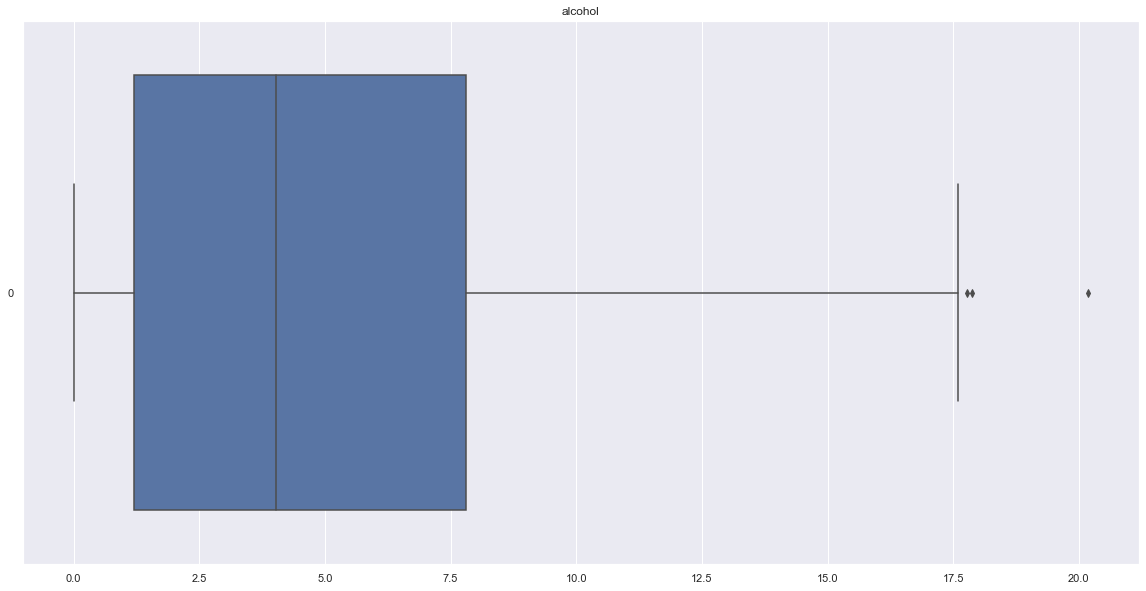

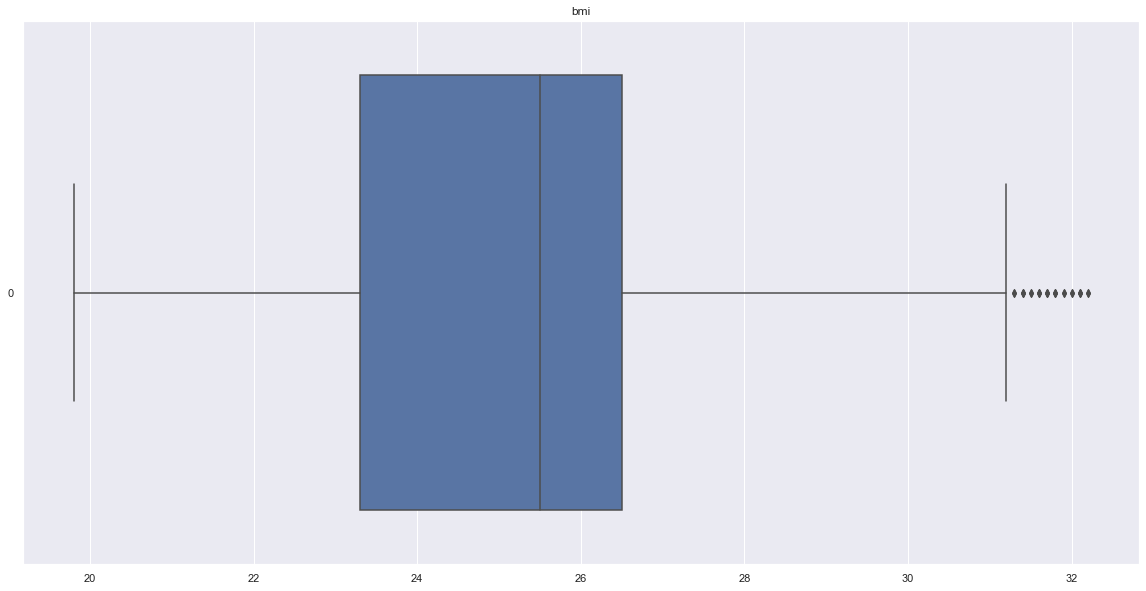

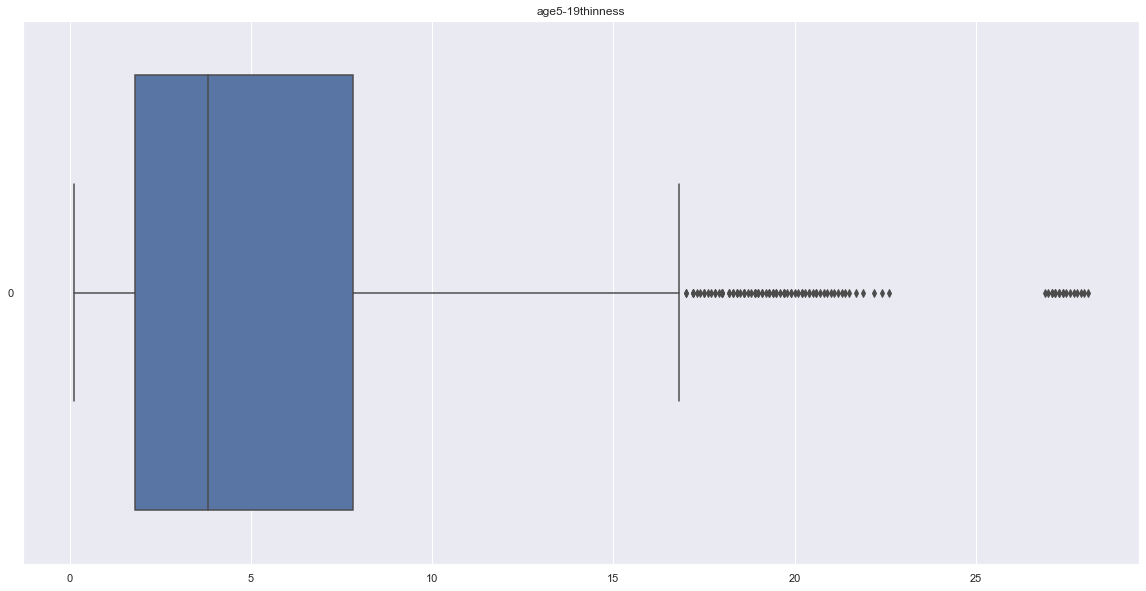

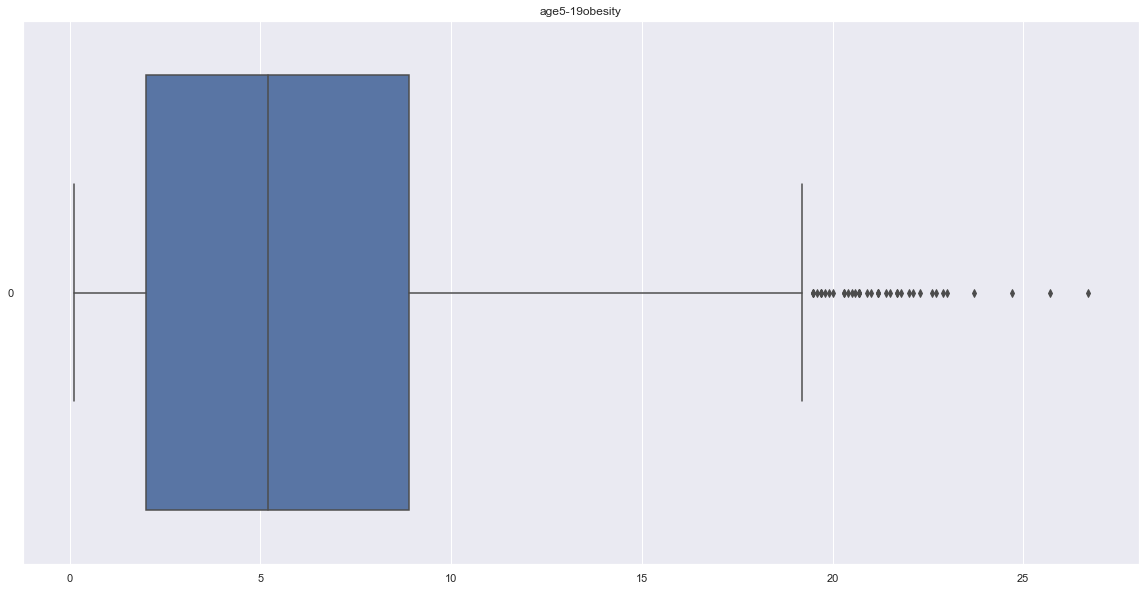

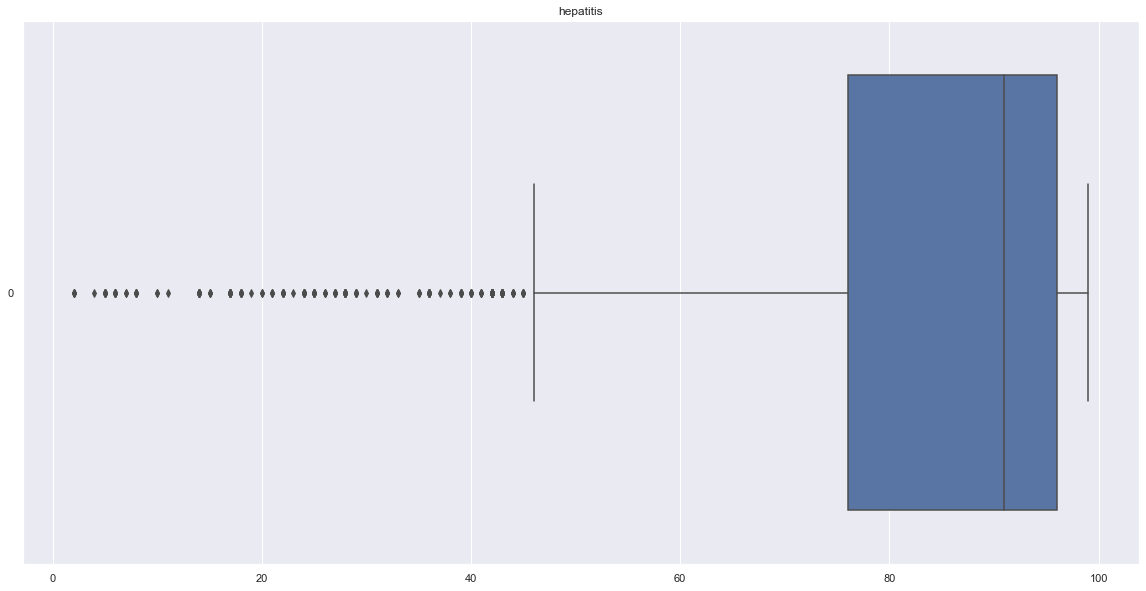

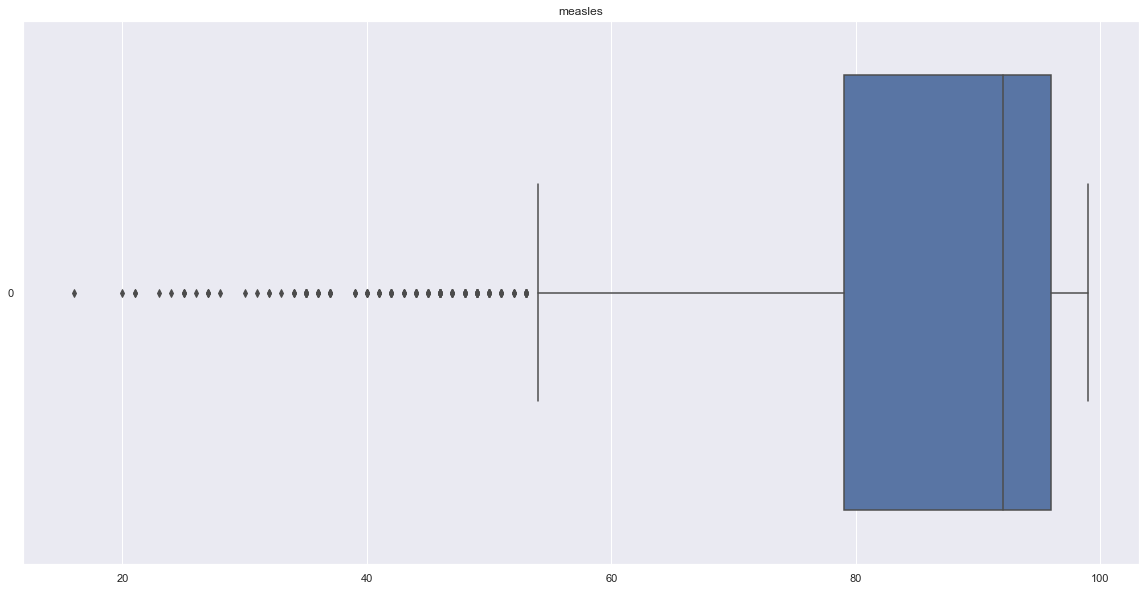

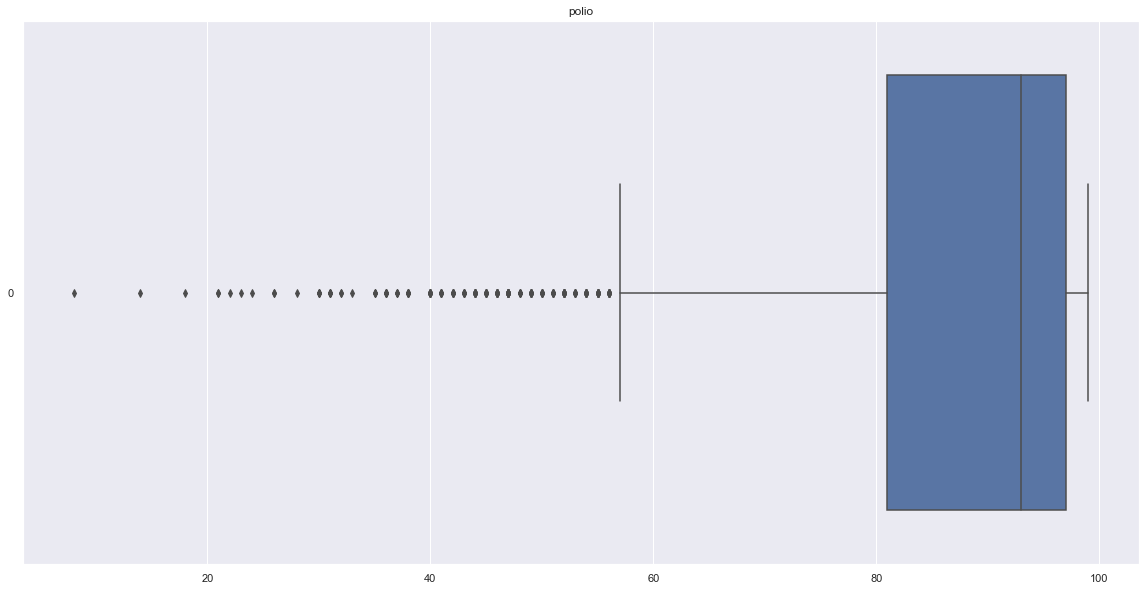

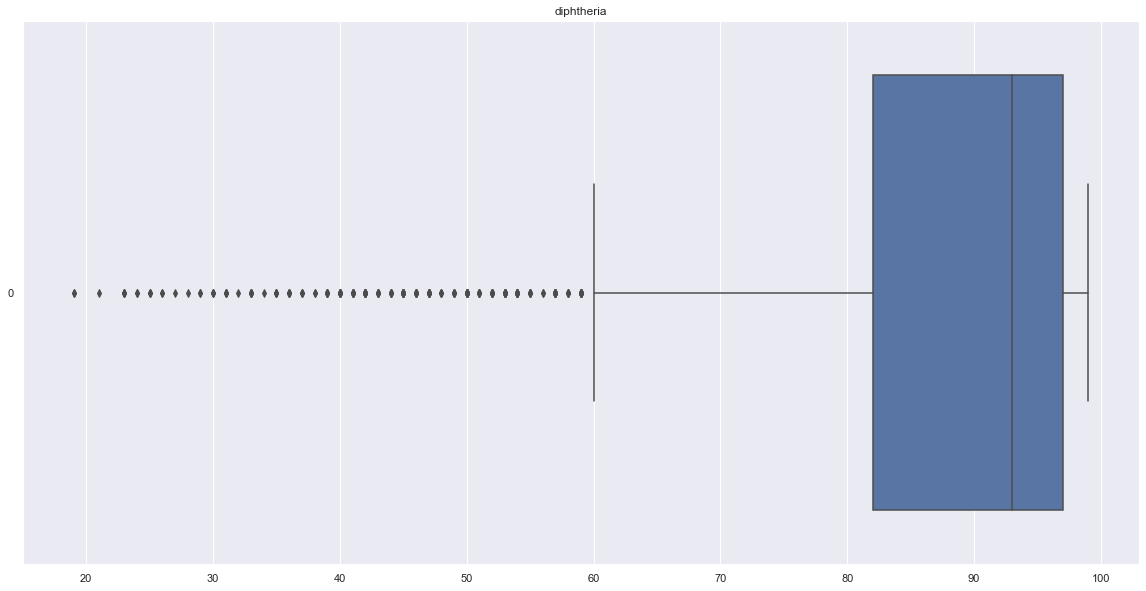

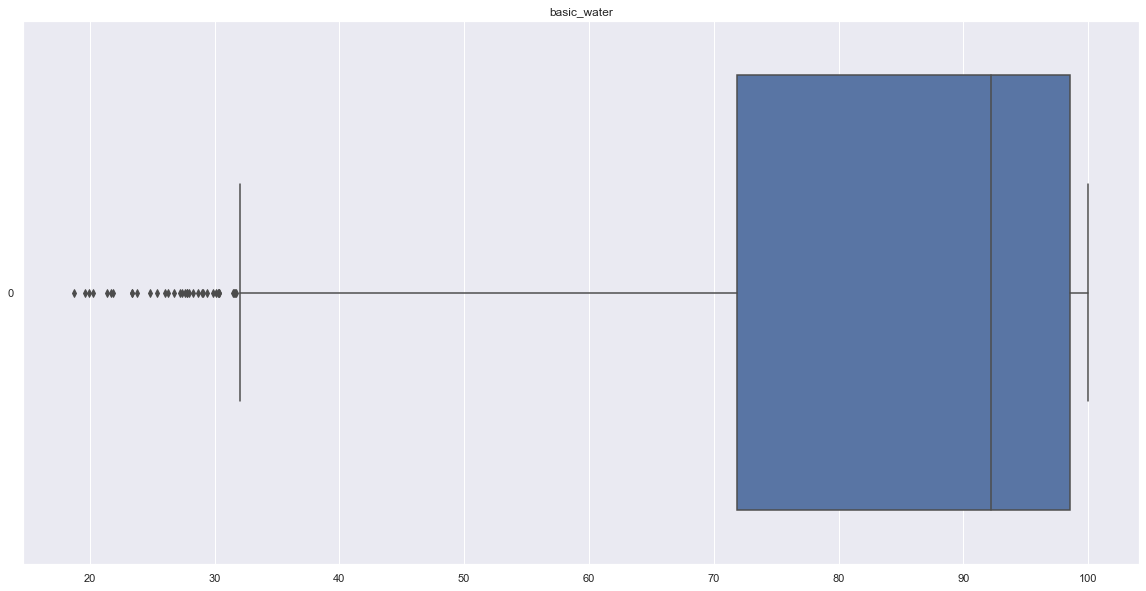

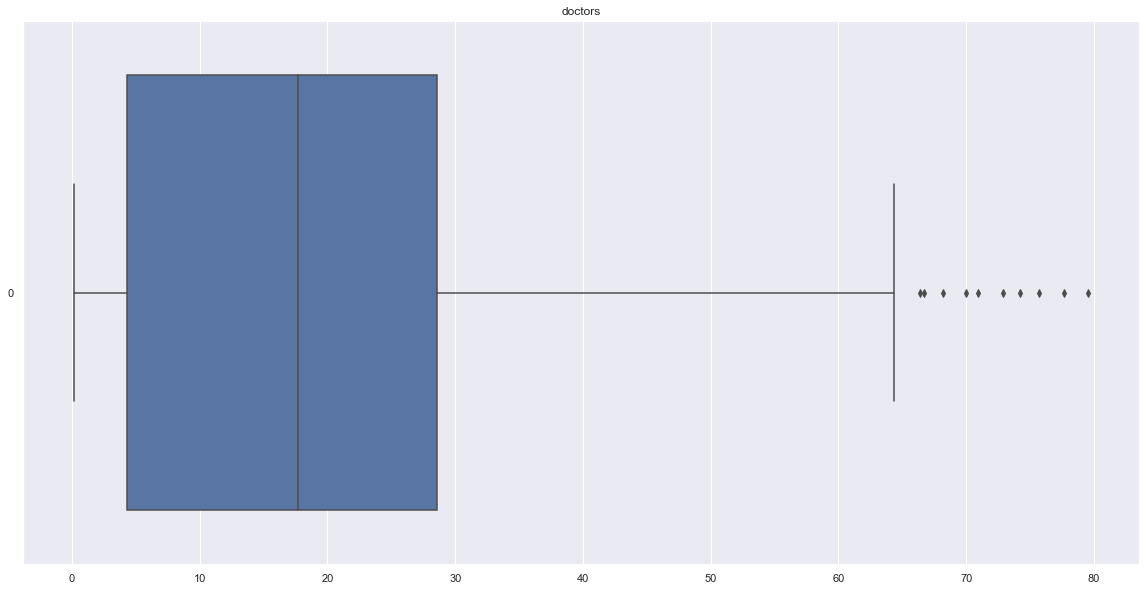

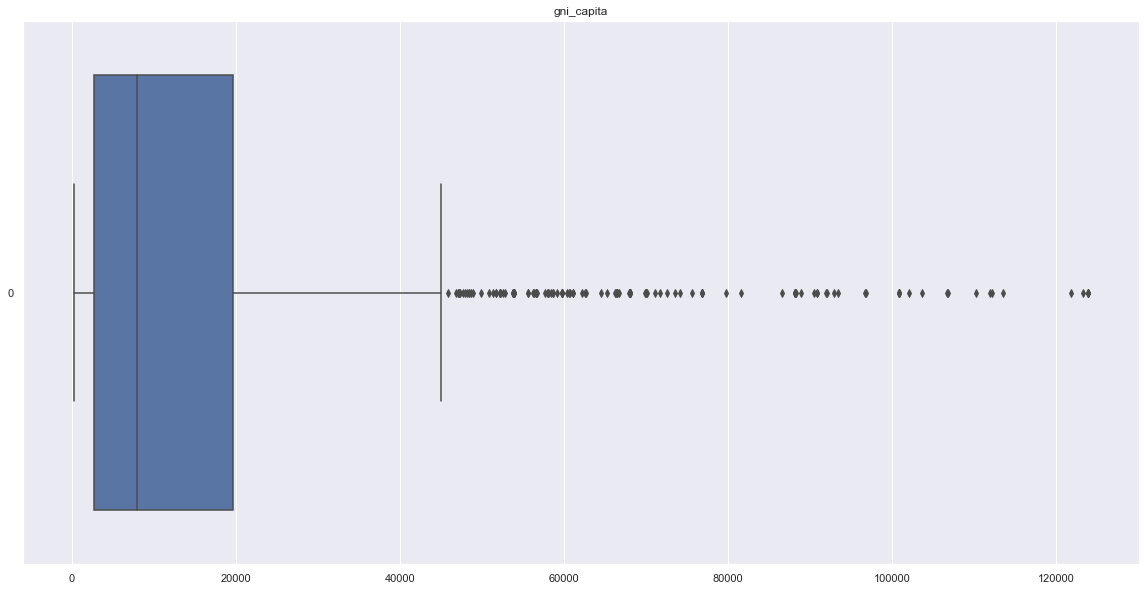

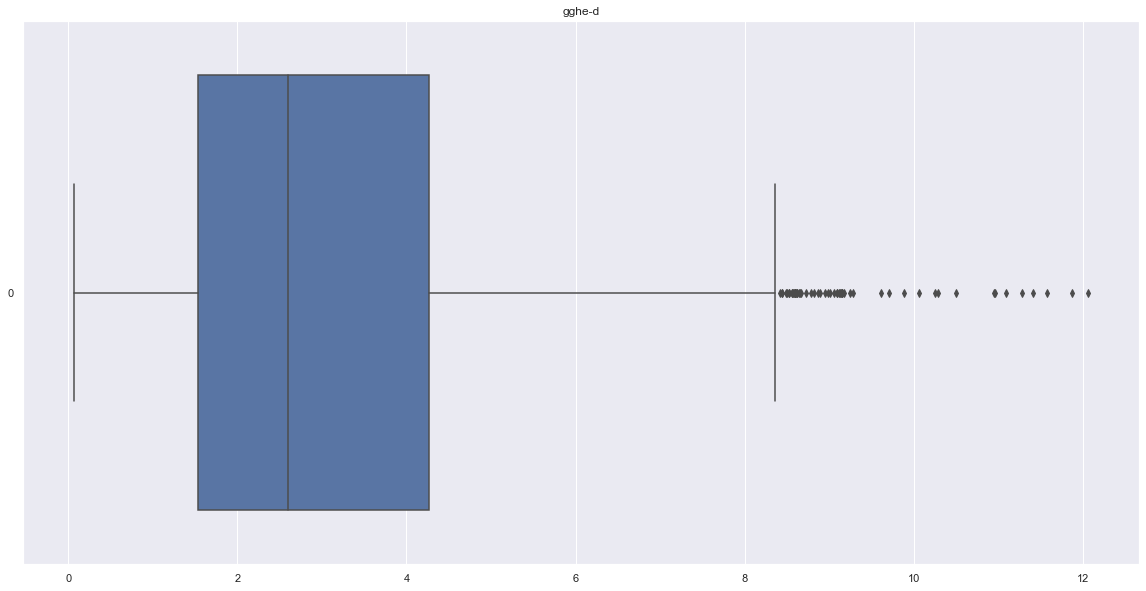

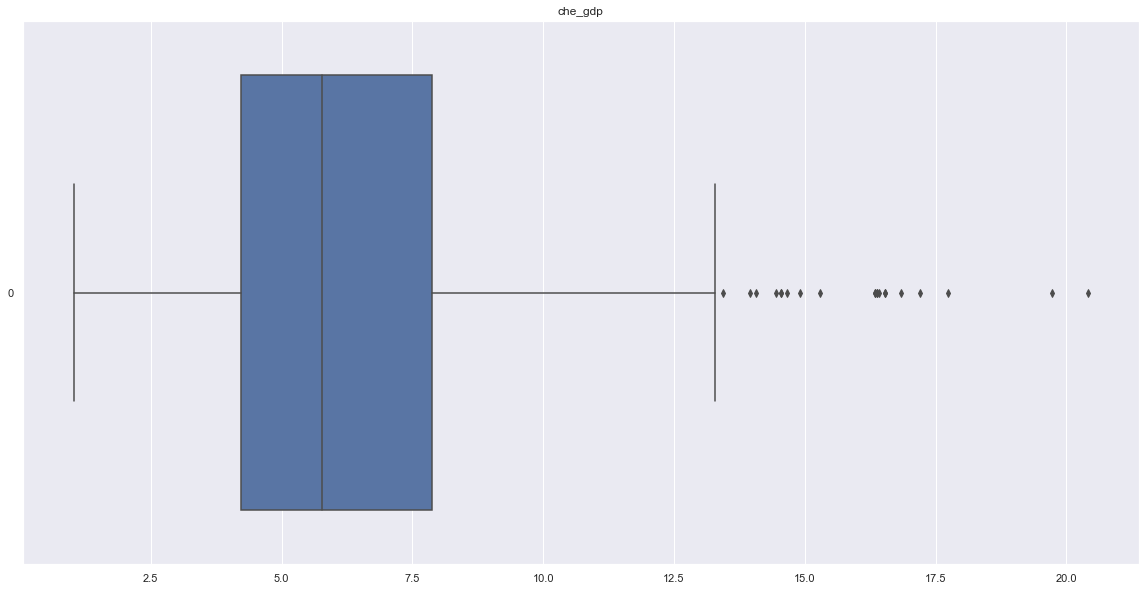

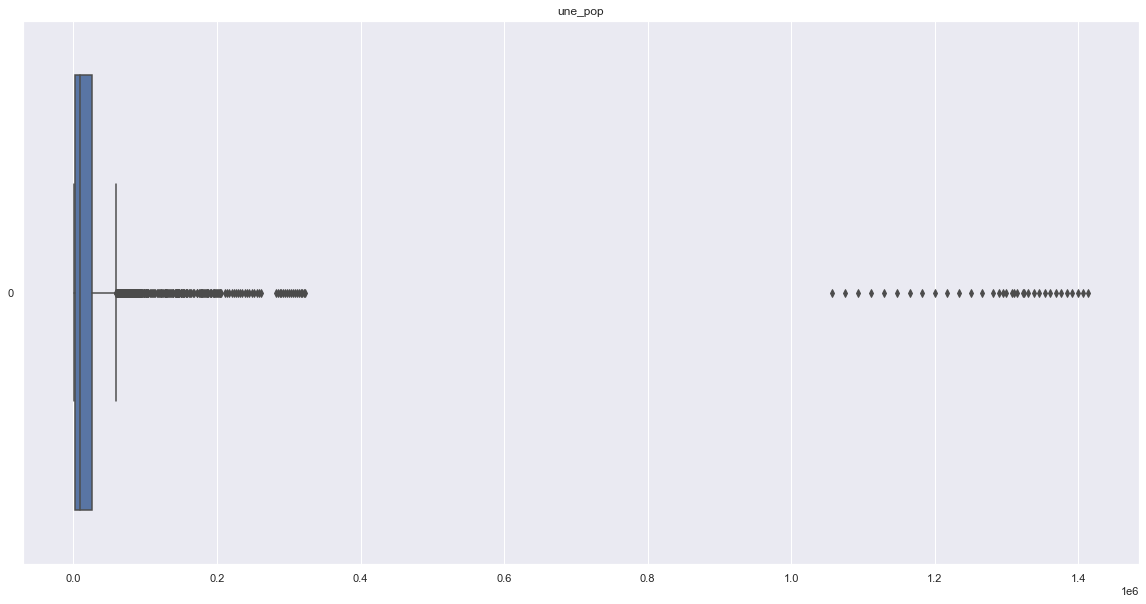

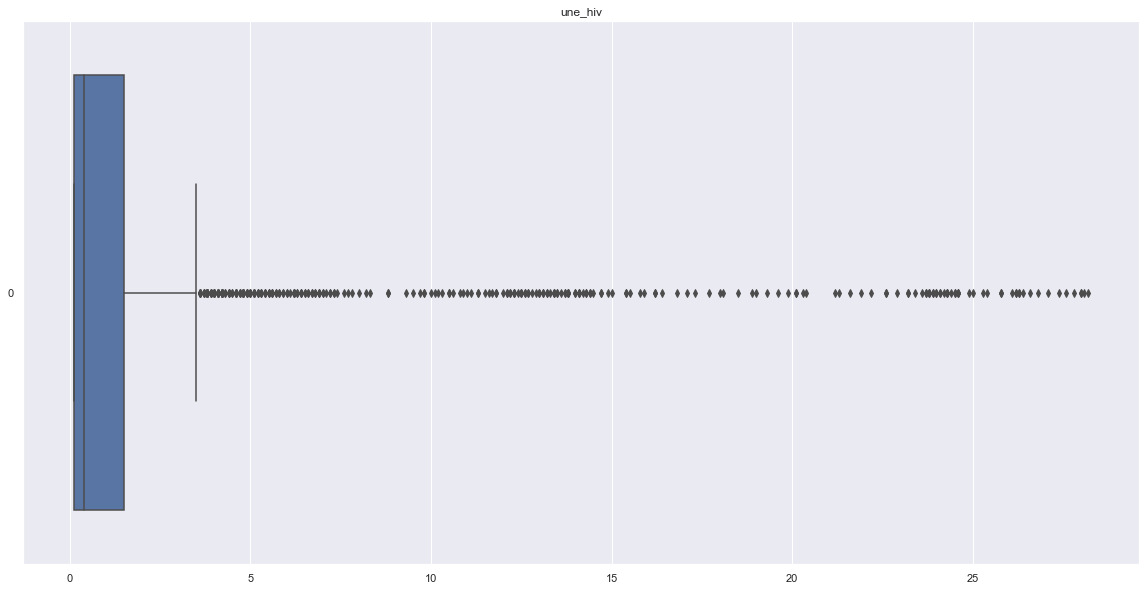

In [365]:
for var in varwithna:
    f = plt.figure(figsize=(20,10))
    sb.boxplot(data = varwithna[var], orient = "h").set_title(var)

In [366]:
Q1 = varwithna.quantile(0.25)
Q3 = varwithna.quantile(0.75)
outlier = ((varwithna < (Q1 - 1.5 * (Q3 - Q1))) | (varwithna > (Q3 + 1.5 * (Q3 - Q1))))
outlier.sum()

alcohol              3
bmi                 25
age5-19thinness     92
age5-19obesity      40
hepatitis          235
measles            164
polio              203
diphtheria         244
basic_water         35
doctors             10
gni_capita         141
gghe-d              55
che_gdp             21
une_pop            365
une_hiv            309
dtype: int64

From the analysis we can see the une_pop has the greatest number of outliers followed by une_hiv. If the correlation of une_pop and une_hivwith life_expect and life_exp60 is very low we will drop the rows with the outlier and plot the ML model to see if there is a difference with and without une_pop.

# Multivariate exploration


In [367]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [368]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [369]:
year = pd.DataFrame(new_df['year'])
year

year
0     2000
1     2001
2     2002
3     2003
4     2004
...    ...
3106  2012
3107  2013
3108  2014
3109  2015
3110  2016

[3111 rows x 1 columns]

In [370]:
life_expect = pd.DataFrame(new_df['life_expect'])
life_expect

life_expect
0        47.33730
1        48.19789
2        49.42569
3        50.50266
4        51.52863
...           ...
3106     64.49448
3107     64.79716
3108     65.10757
3109     65.45008
3110     65.79089

[3111 rows x 1 columns]

In [371]:
life_exp60 = pd.DataFrame(new_df['life_exp60'])
life_exp60

life_exp60
0       14.73400
1       14.95963
2       15.20010
3       15.39144
4       15.56860
...          ...
3106    16.57977
3107    16.64219
3108    16.70787
3109    16.77074
3110    16.83024

[3111 rows x 1 columns]

In [372]:
country = pd.DataFrame(new_df['country'])
country

country
0                               Angola
1                               Angola
2                               Angola
3                               Angola
4                               Angola
...                                ...
3106  Lao People's Democratic Republic
3107  Lao People's Democratic Republic
3108  Lao People's Democratic Republic
3109  Lao People's Democratic Republic
3110  Lao People's Democratic Republic

[3111 rows x 1 columns]

In [373]:
lewithcountry = pd.concat([year,life_expect,country],axis=1).reindex(year.index)
lewithcountry

year  life_expect                           country
0     2000     47.33730                            Angola
1     2001     48.19789                            Angola
2     2002     49.42569                            Angola
3     2003     50.50266                            Angola
4     2004     51.52863                            Angola
...    ...          ...                               ...
3106  2012     64.49448  Lao People's Democratic Republic
3107  2013     64.79716  Lao People's Democratic Republic
3108  2014     65.10757  Lao People's Democratic Republic
3109  2015     65.45008  Lao People's Democratic Republic
3110  2016     65.79089  Lao People's Democratic Republic

[3111 rows x 3 columns]

In [374]:
lewithcountry60 = pd.concat([year,life_exp60,country],axis=1).reindex(year.index)
lewithcountry60

year  life_exp60                           country
0     2000    14.73400                            Angola
1     2001    14.95963                            Angola
2     2002    15.20010                            Angola
3     2003    15.39144                            Angola
4     2004    15.56860                            Angola
...    ...         ...                               ...
3106  2012    16.57977  Lao People's Democratic Republic
3107  2013    16.64219  Lao People's Democratic Republic
3108  2014    16.70787  Lao People's Democratic Republic
3109  2015    16.77074  Lao People's Democratic Republic
3110  2016    16.83024  Lao People's Democratic Republic

[3111 rows x 3 columns]

In [448]:
fig = px.line(new_df, x="year", y="life_expect", title='Life expectancy of different regions over years',color='region')
fig.show()

From the line chart above, there is a significant drop in life expectancy in the Americas region. Upon further research, we found that the sudden drop in life expectancy was due to a 7.0 magnitude earthquake that occured in Haiti in 2010. Hence something to note is that the features do not have a cause and effect relationship with life expectancy as there are many unprecedented circumstances that could alter life expectancy.

Creating a new dataframe with life_expect and life_exp60 and dropped the categorical data in order to do numerical analysis. 

In [385]:
df_numeric = df.drop(labels= ['country','region','year'],axis=1)
df_numeric.info()
df_numeric.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   life_expect       3111 non-null   float64
 1   life_exp60        3111 non-null   float64
 2   adult_mort_rate   3111 non-null   float64
 3   infant_mort_rate  3111 non-null   float64
 4   age1-4_mort_rate  3111 non-null   float64
 5   alcohol           3083 non-null   float64
 6   bmi               3077 non-null   float64
 7   age5-19thinness   3077 non-null   float64
 8   age5-19obesity    3077 non-null   float64
 9   hepatitis         2881 non-null   float64
 10  measles           3100 non-null   float64
 11  polio             3100 non-null   float64
 12  diphtheria        3100 non-null   float64
 13  basic_water       3100 non-null   float64
 14  doctors           2216 non-null   float64
 15  gni_capita        3004 non-null   float64
 16  gghe-d            3043 non-null   float64


(3111, 20)

In [386]:
df_numeric.describe()


life_expect   life_exp60  adult_mort_rate  infant_mort_rate  \
count  3111.000000  3111.000000      3111.000000       3111.000000   
mean     69.146384    18.912060         0.193528          0.032496   
std       9.129761     2.885412         0.114007          0.030361   
min      36.227360    10.728000         0.049202          0.001470   
25%      63.200095    16.619485         0.108270          0.008255   
50%      71.597200    18.508260         0.164822          0.019995   
75%      75.537030    21.099175         0.250832          0.051720   
max      84.166160    26.394020         0.696874          0.164515   

       age1-4_mort_rate      alcohol          bmi  age5-19thinness  \
count       3111.000000  3083.000000  3077.000000      3077.000000   
mean           0.003489     4.850654    25.052714         5.312447   
std            0.005146     4.002535     2.193445         4.652408   
min            0.000065     0.000000    19.800000         0.100000   
25%            0.000355     1.200510    23.300000         1.800000   
50%            0.000895     4.021600    25.500000         3.800000   
75%            0.004877     7.814025    26.500000         7.800000   
max            0.039095    20.182460    32.200000        28.100000   

       age5-19obesity    hepatitis      measles        polio   diphtheria  \
count     3077.000000  2881.000000  3100.000000  3100.000000  3100.000000   
mean         5.972278    82.141617    85.530000    86.584194    86.406129   
std          4.530812    20.565142    15.282203    14.975650    15.335294   
min          0.100000     2.000000    16.000000     8.000000    19.000000   
25%          2.000000    76.000000    79.000000    81.000000    82.000000   
50%          5.200000    91.000000    92.000000    93.000000    93.000000   
75%          8.900000    96.000000    96.000000    97.000000    97.000000   
max         26.700000    99.000000    99.000000    99.000000    99.000000   

       basic_water      doctors     gni_capita       gghe-d      che_gdp  \
count  3100.000000  2216.000000    3004.000000  3043.000000  3026.000000   
mean     83.390295    18.021928   14329.687084     3.116490     6.119615   
std      19.238249    13.906474   17262.440711     2.086198     2.514591   
min      18.695210     0.128000     250.000000     0.062360     1.025160   
25%      71.832918     4.346875    2690.000000     1.532075     4.234580   
50%      92.203705    17.674500    8027.000000     2.601750     5.764255   
75%      98.552870    28.570250   19655.000000     4.269990     7.880403   
max     100.000010    79.541000  123860.000000    12.062730    20.413410   

            une_pop      une_hiv  
count  3.080000e+03  2380.000000  
mean   3.722953e+04     2.031513  
std    1.377832e+05     4.585364  
min    7.601600e+01     0.100000  
25%    2.197585e+03     0.100000  
50%    8.568698e+03     0.400000  
75%    2.517140e+04     1.500000  
max    1.414049e+06    28.200000

In [387]:
print(df_numeric.corr())


                  life_expect  life_exp60  adult_mort_rate  infant_mort_rate  \
life_expect          1.000000    0.886159        -0.946419         -0.930113   
life_exp60           0.886159    1.000000        -0.775321         -0.769839   
adult_mort_rate     -0.946419   -0.775321         1.000000          0.813210   
infant_mort_rate    -0.930113   -0.769839         0.813210          1.000000   
age1-4_mort_rate    -0.864414   -0.661082         0.756230          0.909032   
alcohol              0.402975    0.465281        -0.250410         -0.448747   
bmi                  0.597996    0.458839        -0.517095         -0.641874   
age5-19thinness     -0.565396   -0.556536         0.455205          0.578230   
age5-19obesity       0.621000    0.547764        -0.571792         -0.602402   
hepatitis            0.398373    0.299663        -0.326215         -0.470327   
measles              0.640817    0.505314        -0.526452         -0.720781   
polio                0.646339    0.50197

<AxesSubplot:>

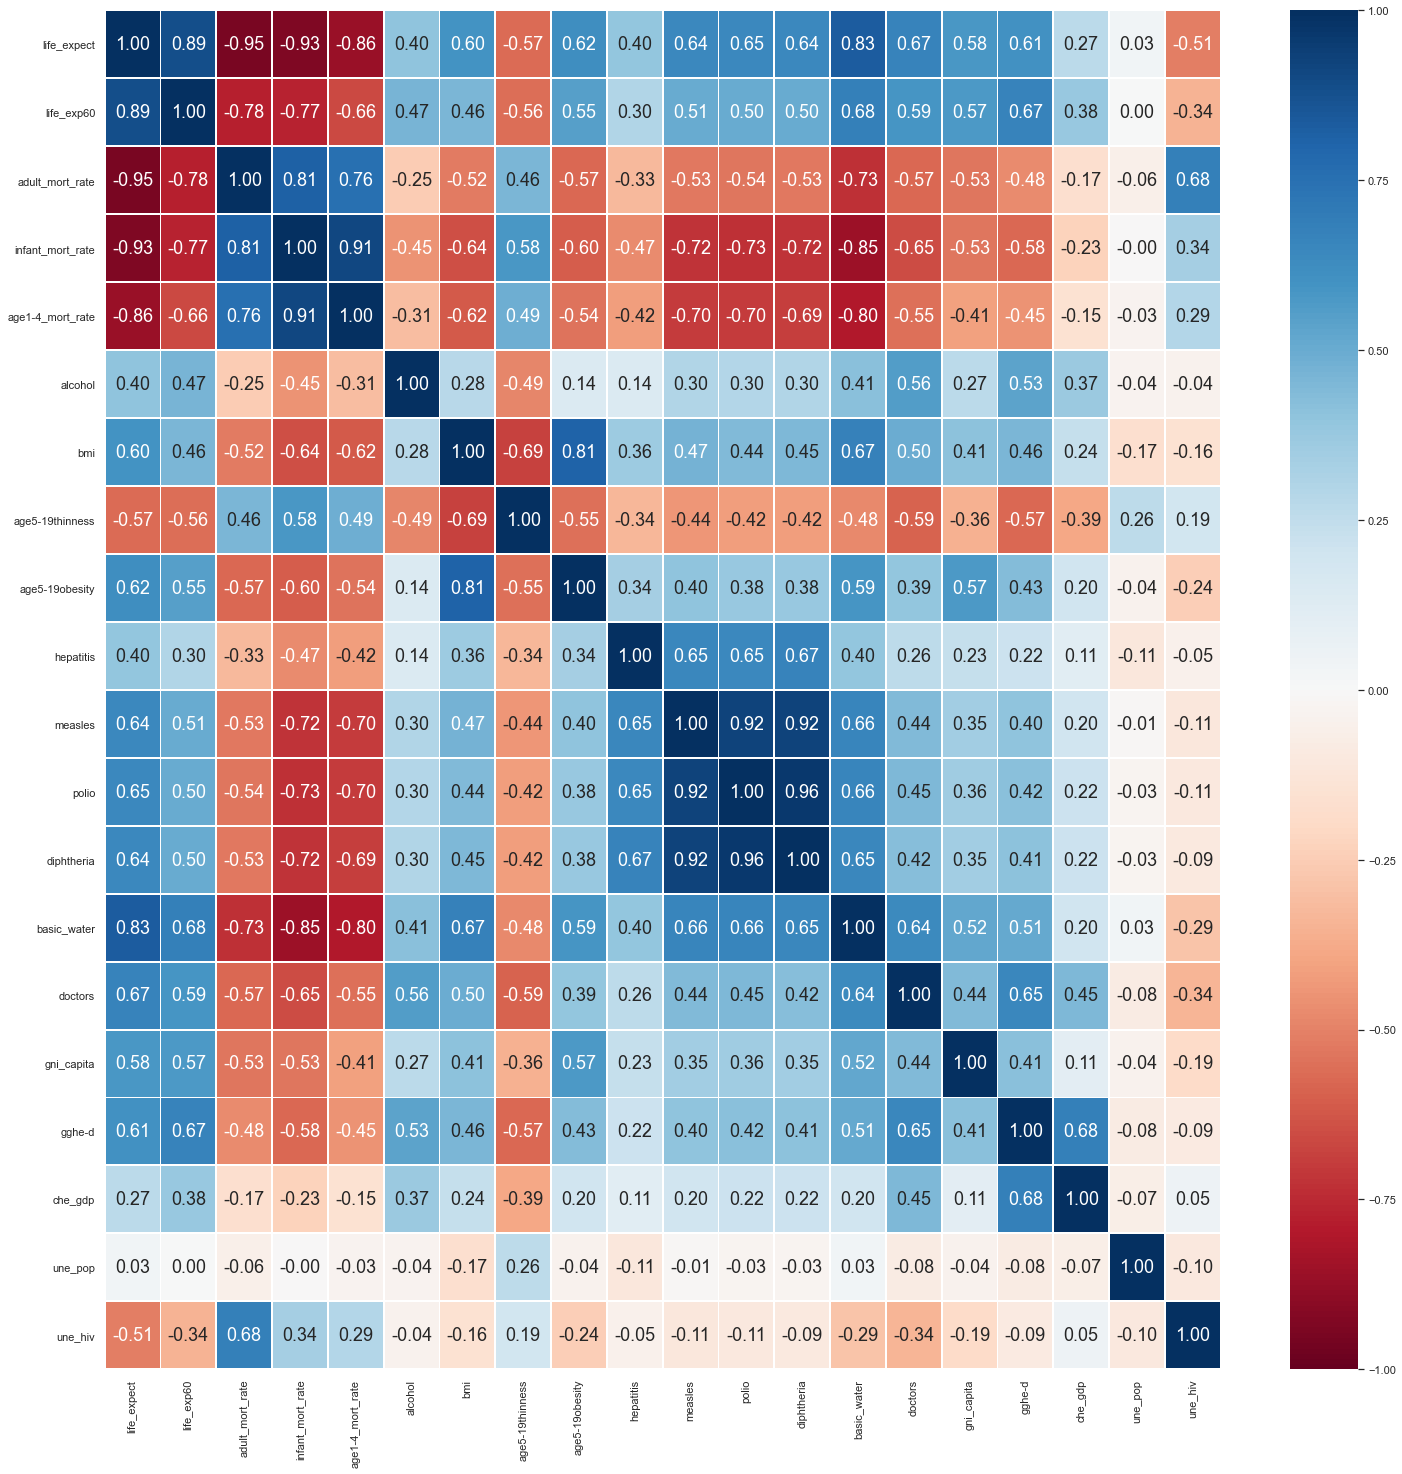

In [388]:
# Heatmap of the Correlation Matrix
#should i do according to regions? or year?
f = plt.figure(figsize=(25, 25))
sb.heatmap(df_numeric.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [389]:
region_names = df['region'].unique()
region_names

array(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'], dtype=object)

compare 2 variables using jointplot in order to see which factor is the most significant

# Comparing features with life_expect

<ipython-input-423-c639f879655d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(20,10))


<Figure size 1440x720 with 0 Axes>

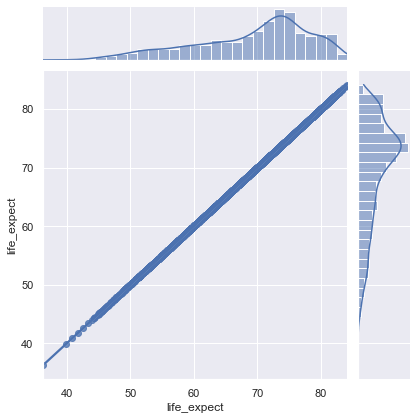

<Figure size 1440x720 with 0 Axes>

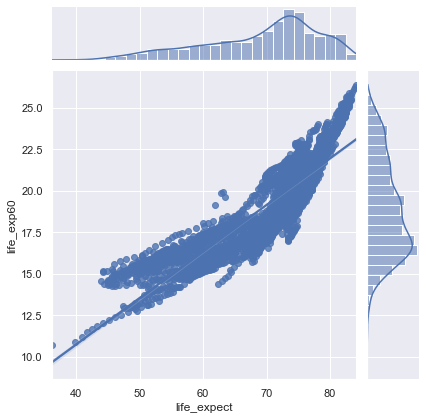

<Figure size 1440x720 with 0 Axes>

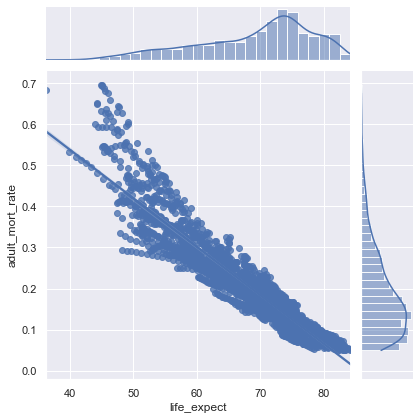

<Figure size 1440x720 with 0 Axes>

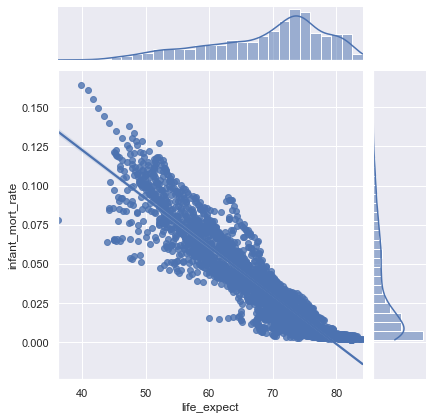

<Figure size 1440x720 with 0 Axes>

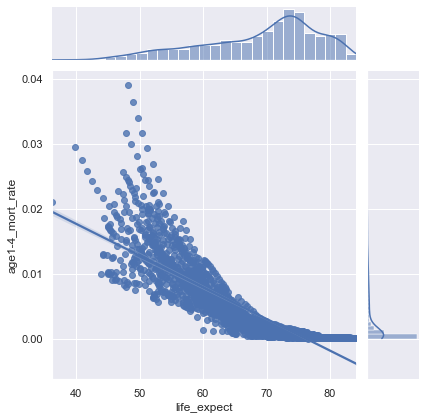

<Figure size 1440x720 with 0 Axes>

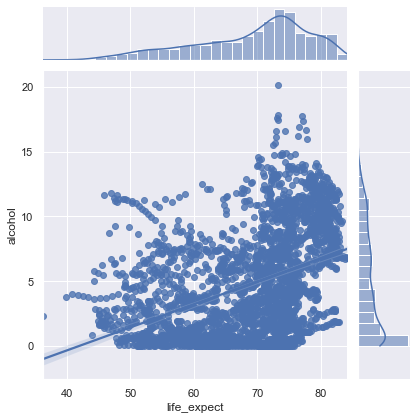

<Figure size 1440x720 with 0 Axes>

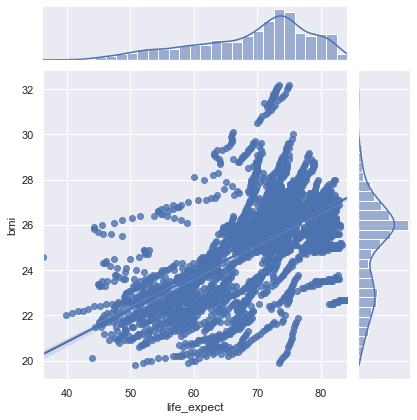

<Figure size 1440x720 with 0 Axes>

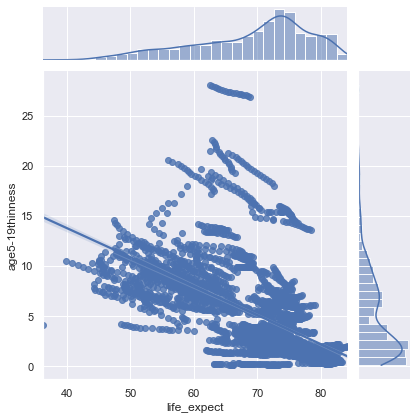

<Figure size 1440x720 with 0 Axes>

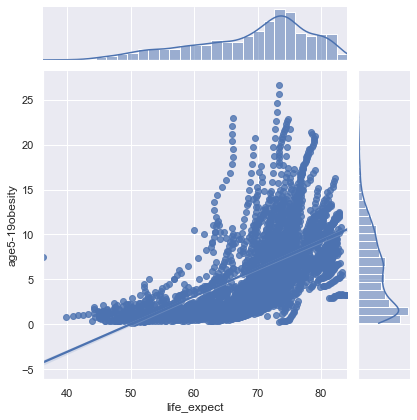

<Figure size 1440x720 with 0 Axes>

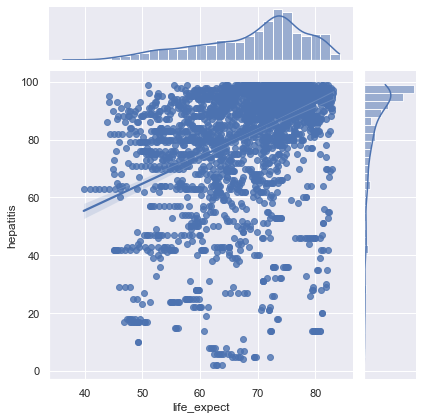

<Figure size 1440x720 with 0 Axes>

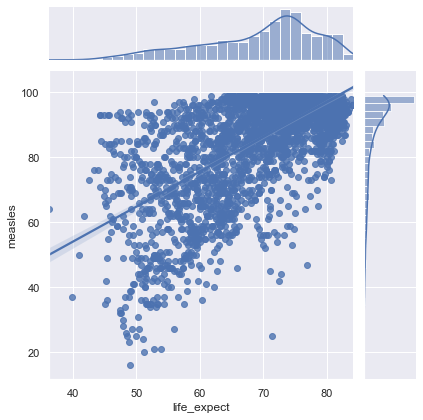

<Figure size 1440x720 with 0 Axes>

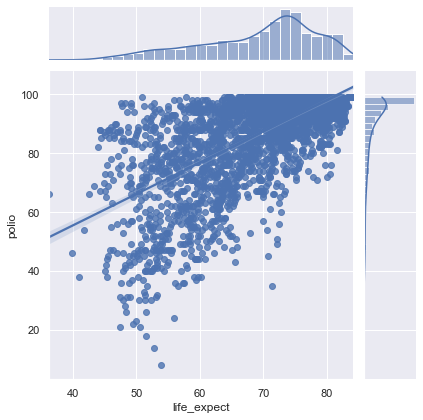

<Figure size 1440x720 with 0 Axes>

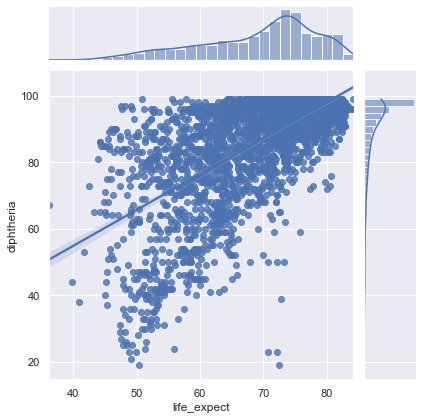

<Figure size 1440x720 with 0 Axes>

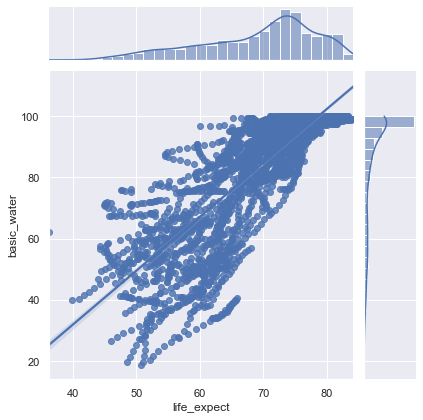

<Figure size 1440x720 with 0 Axes>

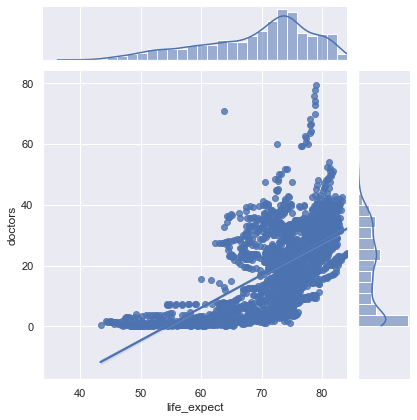

<Figure size 1440x720 with 0 Axes>

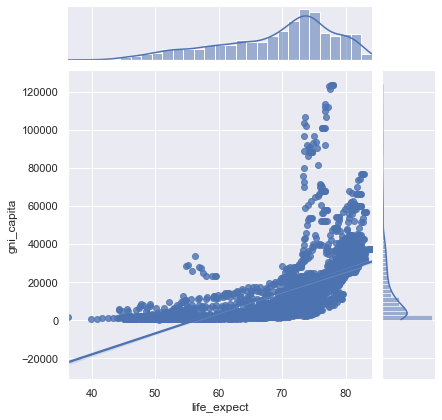

<Figure size 1440x720 with 0 Axes>

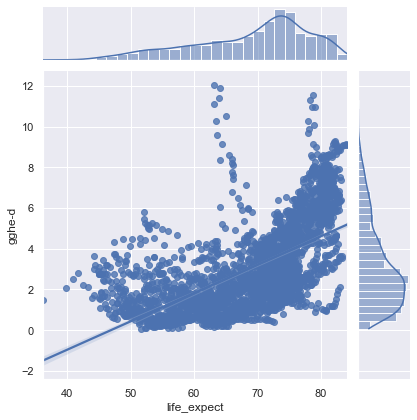

<Figure size 1440x720 with 0 Axes>

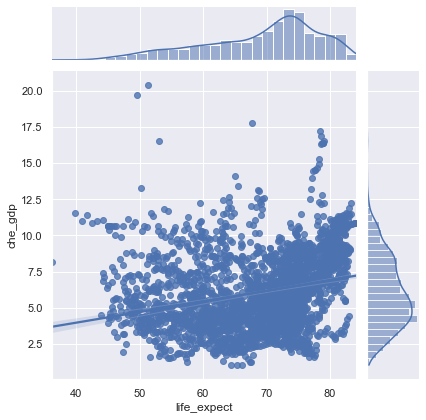

<Figure size 1440x720 with 0 Axes>

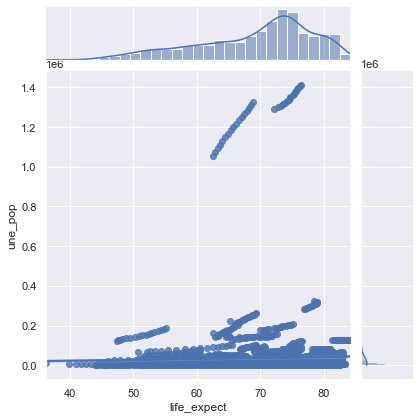

<Figure size 1440x720 with 0 Axes>

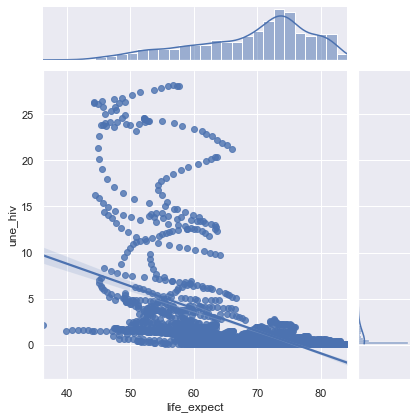

In [423]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=df_numeric, x="life_expect", y=i, kind="reg")

# Comparing features with life_exp60

<ipython-input-424-8d474de11f4f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(20,10))


<Figure size 1440x720 with 0 Axes>

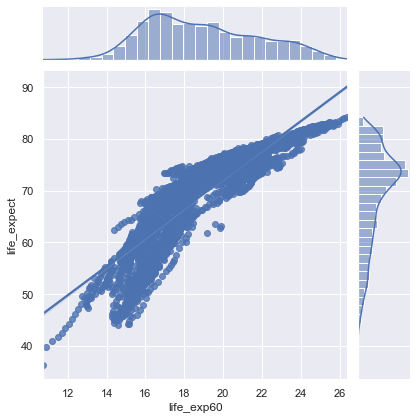

<Figure size 1440x720 with 0 Axes>

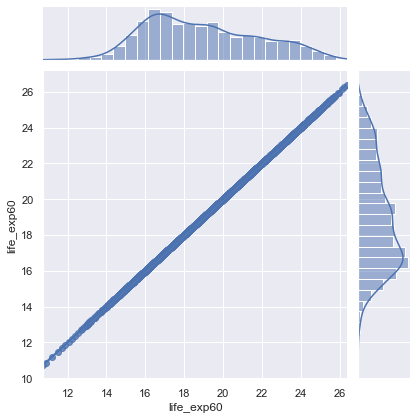

<Figure size 1440x720 with 0 Axes>

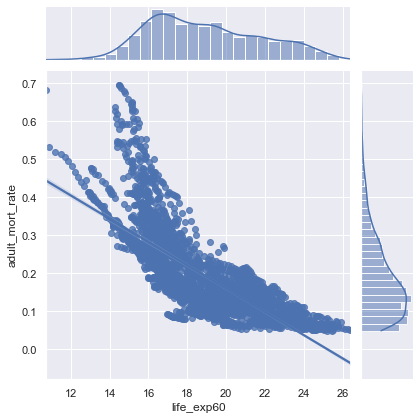

<Figure size 1440x720 with 0 Axes>

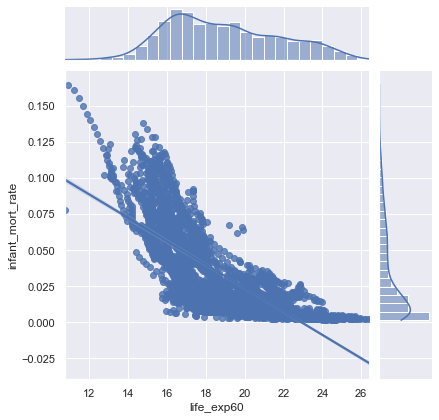

<Figure size 1440x720 with 0 Axes>

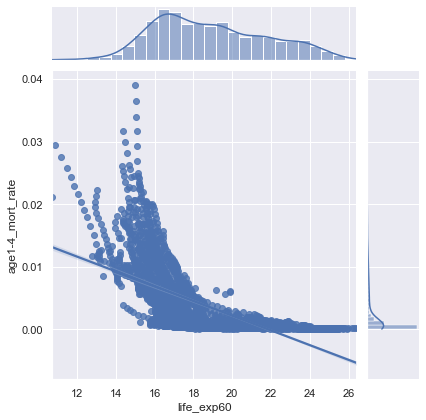

<Figure size 1440x720 with 0 Axes>

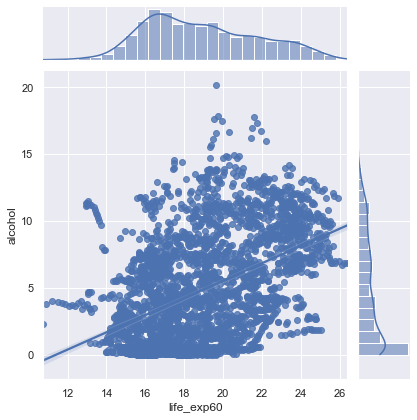

<Figure size 1440x720 with 0 Axes>

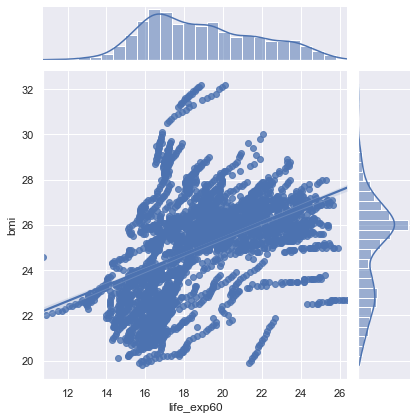

<Figure size 1440x720 with 0 Axes>

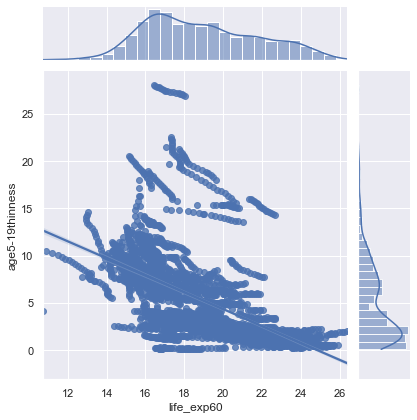

<Figure size 1440x720 with 0 Axes>

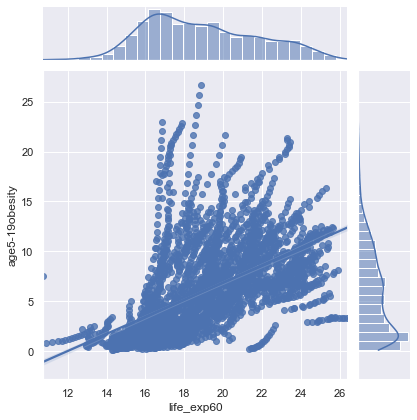

<Figure size 1440x720 with 0 Axes>

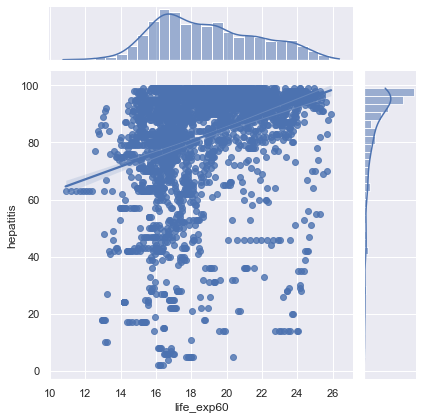

<Figure size 1440x720 with 0 Axes>

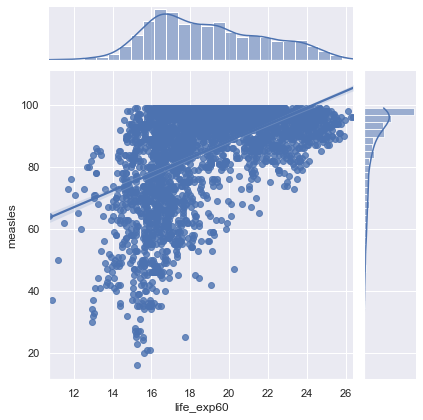

<Figure size 1440x720 with 0 Axes>

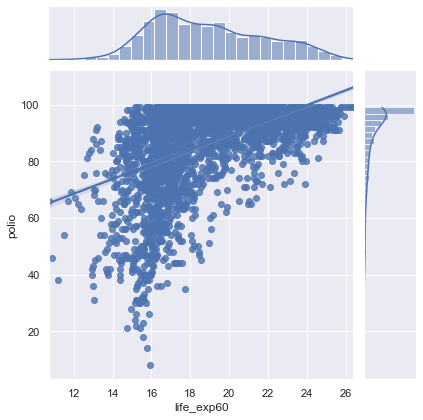

<Figure size 1440x720 with 0 Axes>

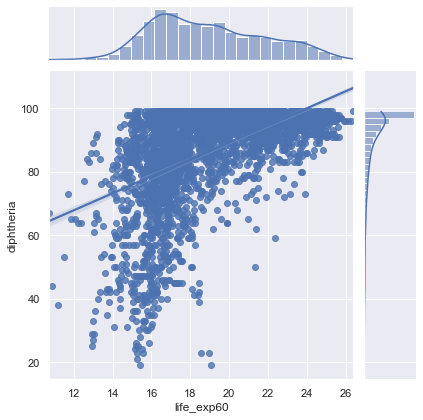

<Figure size 1440x720 with 0 Axes>

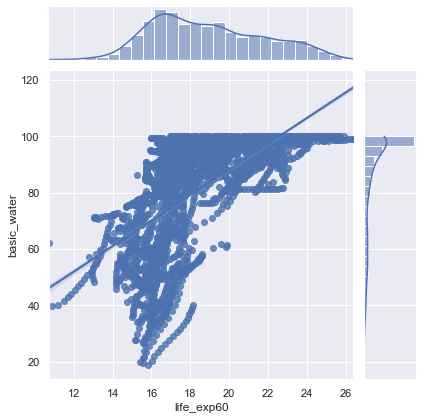

<Figure size 1440x720 with 0 Axes>

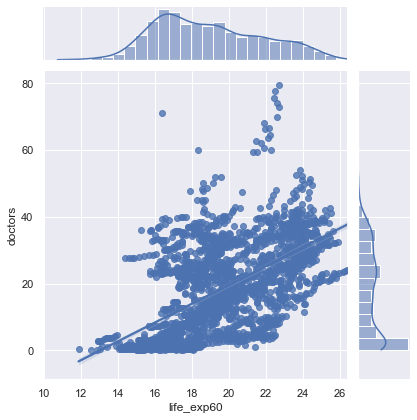

<Figure size 1440x720 with 0 Axes>

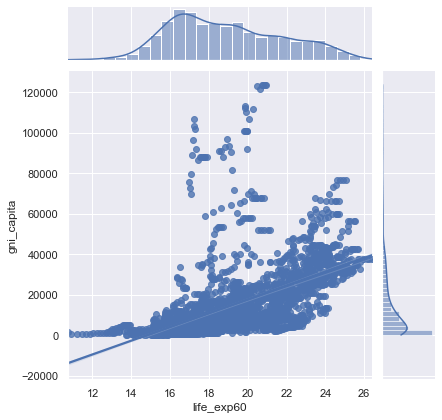

<Figure size 1440x720 with 0 Axes>

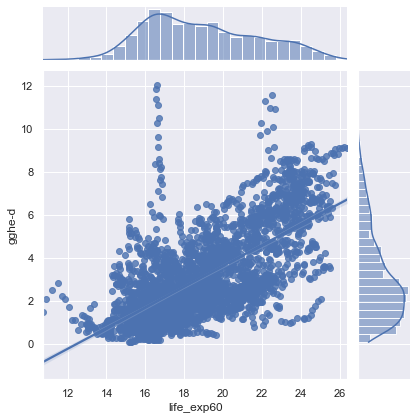

<Figure size 1440x720 with 0 Axes>

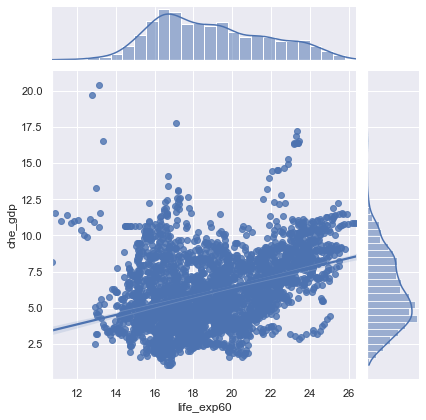

<Figure size 1440x720 with 0 Axes>

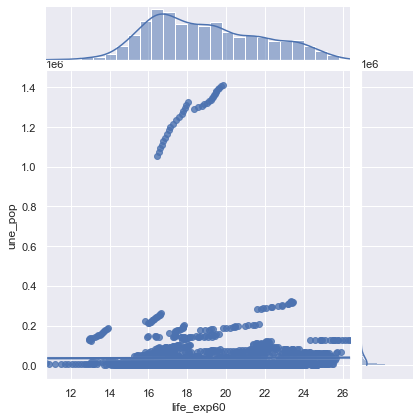

<Figure size 1440x720 with 0 Axes>

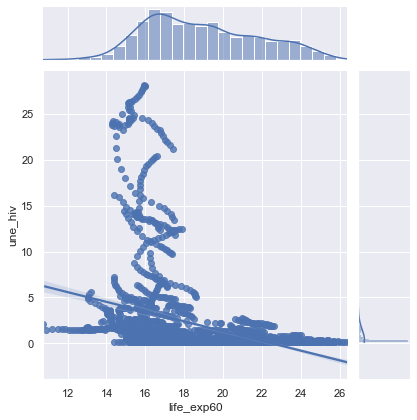

In [424]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=df_numeric, x="life_exp60", y=i, kind="reg")

# Outlier analysis

From the heatmap the correlation of une_pop is very low at 0.03 with life_expect and 0.00 with life_exp60. The distribution on the scatter plot also does not show a strong relationship with life_expect and life_exp60. Hence, we can drop une_pop since it is not very relevant to predicting life expectancy. However, we would not drop une_hiv since it still has a relationship with life_expect and life_exp60 as seen in the jointplot despite the feature having the second most amount of outliers.

# Insights from EDA

From the jointplot, we can see the alcohol has a positive relation with life expectancy and life expectancy from 60. Alcohol has a 0.40 correlation with life expectancy and has a 0.47 correlation with life expectancy from 60. 

This is different from our assumption as we assumed that alcohol would have a negative relationship with life expectancy. Upon further research, we realised that alcohol in moderation can have beneficial health effects and may lead to longetivity. (https://time.com/5166514/moderate-drinking-live-longer-study/)

Furthermore, from the distibution of alcohol we can see that the median is around 4.02 liters per capita and the median of life_exp60 is around 18.5 years. The median of alcohol is close to its mean which is 4.85 and the mean of life_exp60 is around 18.9 years which is close to its median. Hence, on average, countries have a low to moderate alcohol consumption . This coincides with the conclusion that there is a positive relationship between alcohol and life expectancy when alcohol is consumed in moderation.

Since life_expect and life_exp60 have a strong correlation we just plotted life_exp60 since it has a stronger correlation with alcohol.

<Figure size 1440x720 with 0 Axes>

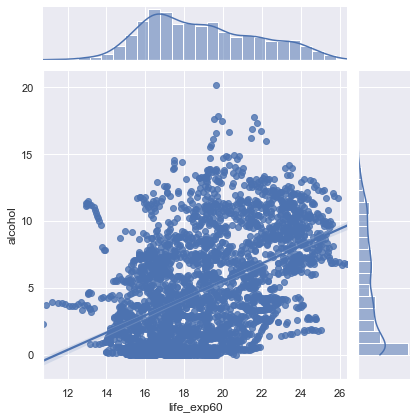

In [430]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_exp60", y="alcohol", kind="reg")

Another area of interest is the obesity rate from ages 5-19 and thiness from ages 5-19. Thinness and obesity have a slightly higher correlation with life expectancy (-0.57 and 0.62 respectively) than with life expectancy at 60 (-0.56 and 0.55 respectively). However, the correlations are very close to each other so we will just be using life_expect as a comparison.

<Figure size 1440x720 with 0 Axes>

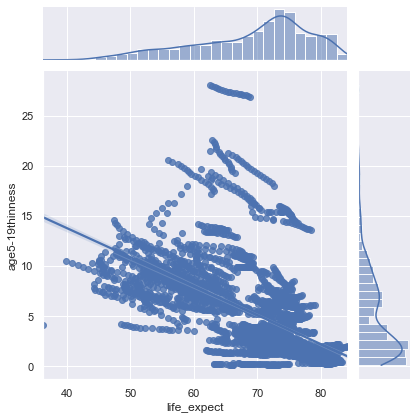

In [436]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_expect", y="age5-19thinness", kind="reg")

<Figure size 1440x720 with 0 Axes>

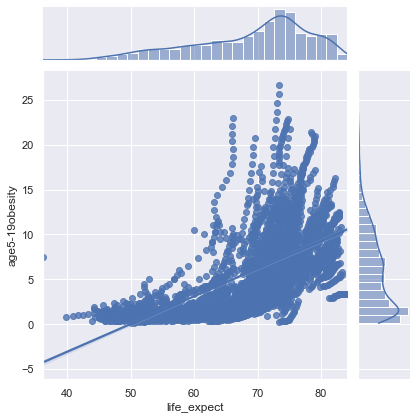

In [437]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_expect", y="age5-19obesity", kind="reg")

<Figure size 1440x720 with 0 Axes>

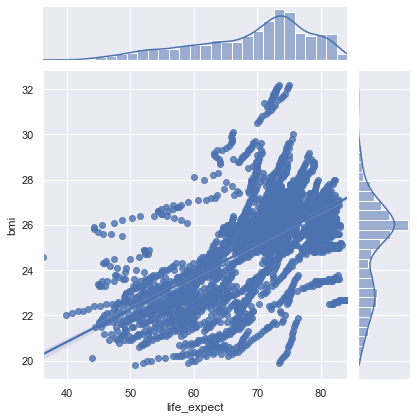

In [438]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_expect", y="bmi", kind="reg")

This contradicted our assumptions that age 5-19 obesity would lead to a decreased life expectancy. 

# Analysis of top predictors for life expectancy and life expectancy at 60

From the heatmap some areas of interest are adult mortality rate, infant mortality rate and age1-4 mortality rate as they have the strongest negative correlation with life expectancy (-0.95,-0.93,-0.86 respectively). They also have the strongest correlation rate with life expectancy at 60 which is -0.78 with adult mortality rate, -0.77 with infant mortality rate and -0.66 with child(ages 1-4) mortality rate.

In [395]:
adult_mort_rate = pd.DataFrame(df_numeric['adult_mort_rate'])
adult_mort_rate

adult_mort_rate
0            0.383558
1            0.372388
2            0.354515
3            0.343217
4            0.333871
...               ...
3106         0.209267
3107         0.205146
3108         0.200820
3109         0.196661
3110         0.192794

[3111 rows x 1 columns]

In [396]:
infant_mort_rate = pd.DataFrame(df_numeric['infant_mort_rate'])
infant_mort_rate

infant_mort_rate
0             0.137985
1             0.133675
2             0.128320
3             0.122040
4             0.115700
...                ...
3106          0.055840
3107          0.055350
3108          0.054585
3109          0.053465
3110          0.051895

[3111 rows x 1 columns]

In [397]:
child_mort_rate = pd.DataFrame(df_numeric['age1-4_mort_rate'])
child_mort_rate

age1-4_mort_rate
0             0.025695
1             0.024500
2             0.023260
3             0.021925
4             0.020545
...                ...
3106          0.004845
3107          0.004600
3108          0.004405
3109          0.004160
3110          0.003990

[3111 rows x 1 columns]

In [431]:
life_exp60 = pd.DataFrame(df_numeric['life_exp60'])
life_exp60

life_exp60
0       14.73400
1       14.95963
2       15.20010
3       15.39144
4       15.56860
...          ...
3106    16.57977
3107    16.64219
3108    16.70787
3109    16.77074
3110    16.83024

[3111 rows x 1 columns]

In [398]:
mort_rate = pd.concat([life_expect,adult_mort_rate,infant_mort_rate,child_mort_rate],axis=1).reindex(life_expect.index)
mort_rate

life_expect  adult_mort_rate  infant_mort_rate  age1-4_mort_rate
0        47.33730         0.383558          0.137985          0.025695
1        48.19789         0.372388          0.133675          0.024500
2        49.42569         0.354515          0.128320          0.023260
3        50.50266         0.343217          0.122040          0.021925
4        51.52863         0.333871          0.115700          0.020545
...           ...              ...               ...               ...
3106     64.49448         0.209267          0.055840          0.004845
3107     64.79716         0.205146          0.055350          0.004600
3108     65.10757         0.200820          0.054585          0.004405
3109     65.45008         0.196661          0.053465          0.004160
3110     65.79089         0.192794          0.051895          0.003990

[3111 rows x 4 columns]

In [433]:
mort_rate60 = pd.concat([life_exp60,adult_mort_rate,infant_mort_rate,child_mort_rate],axis=1).reindex(life_expect.index)
mort_rate60

life_exp60  adult_mort_rate  infant_mort_rate  age1-4_mort_rate
0       14.73400         0.383558          0.137985          0.025695
1       14.95963         0.372388          0.133675          0.024500
2       15.20010         0.354515          0.128320          0.023260
3       15.39144         0.343217          0.122040          0.021925
4       15.56860         0.333871          0.115700          0.020545
...          ...              ...               ...               ...
3106    16.57977         0.209267          0.055840          0.004845
3107    16.64219         0.205146          0.055350          0.004600
3108    16.70787         0.200820          0.054585          0.004405
3109    16.77074         0.196661          0.053465          0.004160
3110    16.83024         0.192794          0.051895          0.003990

[3111 rows x 4 columns]

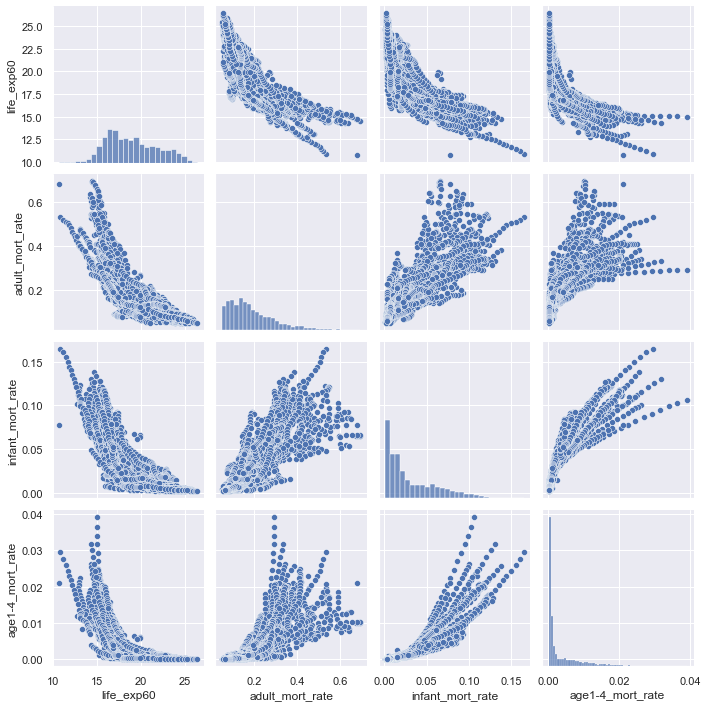

In [434]:
sb.pairplot(data = mort_rate60)

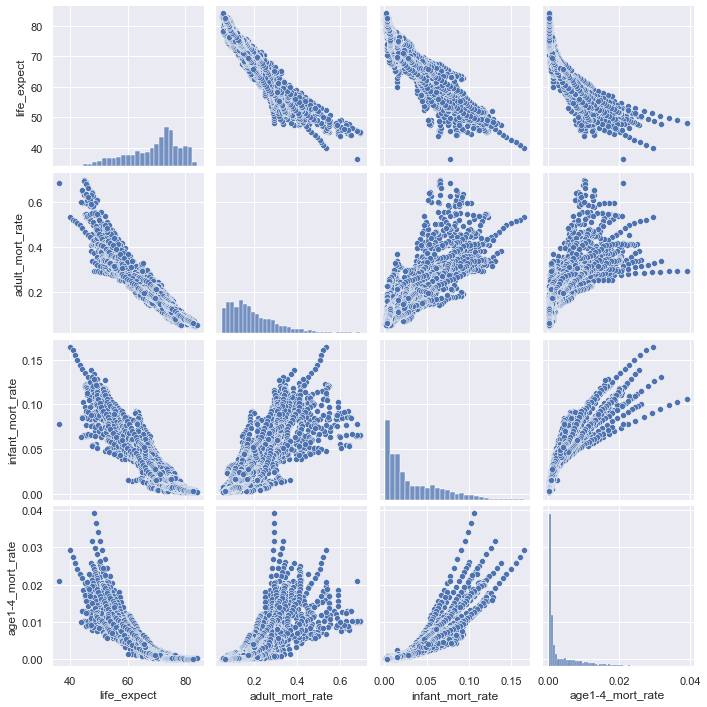

In [399]:
sb.pairplot(data = mort_rate)

There is a linear relationship between mortality rates and life expectancy as well as between mortality rates and life expectancy at 60. Since the pair plot results of both life expectancy and life expectancy at 60 is similar, we will just be using life expectancy as a comparison. 

As life expectancy increases, the mortality rates of adult, infant, and child from ages 1 to 4 all decrease as well. From the pairplot we can see that the relationship between adult mortality and life expectancy is the strongest followed by infant mortality rate and then mortality rates from ages 1-4. 

We can explore what factors are significant in affecting mortality rate across age groups and if it is the same across all age groups. 

From the heatmap above we can see a relatively high correlation between the mortality rates and other factors as well. 

For adult mortality, it has strong correlation with infant mortality,child mortality and basic water at -0.81,-0.76 and -0.73 respectively.

For infant mortality, it has strong correlation between child mortality, adult mortality and basic water as well at -0.91,-0.81 and -0.85 respectively. Infant mortality also had a strong correlation with polio, measles and diptheria vaccination at -0.73,-0.72 and -0.72 respectively.

For child mortality(ages 1-4), it has strong correlation between infant mortality, adult mortality and basic water as well at -0.91,-0.76 and -0.80 respectively.Child mortality also had a strong correlation with polio, measles and diptheria vaccination at -0.70,-0.70 and -0.69 respectively.

Note that children under 5 are at high risk for polio, measles and diptheria and hence being vaccinated against these diseases would contribute towards the strong linear relationship with life expectancy.



<Figure size 1440x720 with 0 Axes>

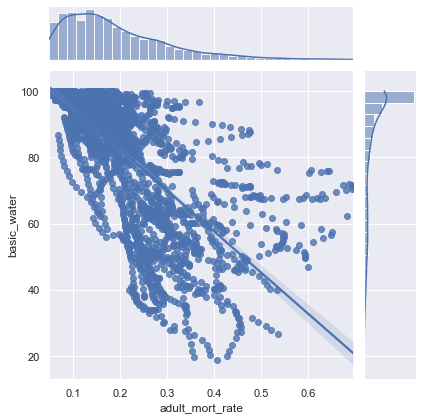

In [427]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="adult_mort_rate", y="basic_water", kind="reg")

<Figure size 1440x720 with 0 Axes>

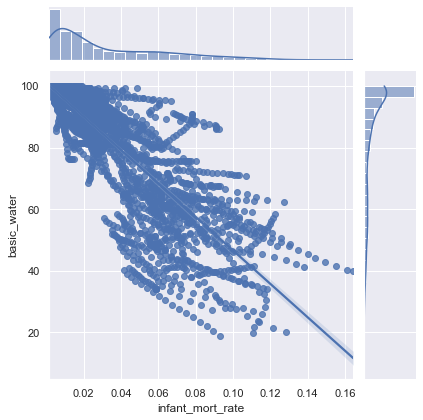

In [428]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="infant_mort_rate", y="basic_water", kind="reg")

<Figure size 1440x720 with 0 Axes>

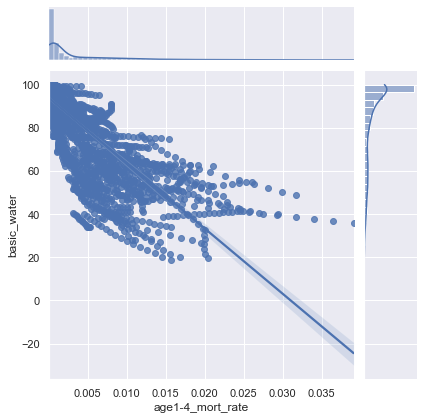

In [429]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="age1-4_mort_rate", y="basic_water", kind="reg")

From the scatter plots above we can see that water and adult, infant and child (1-4) mortality rate is related to the percentage of the population having access to basic water services. The median for basic water is about 92% and the median for the adult, infant and child mortality are all relatively low at around 0 to 0.2. 

This could be the reason why basic water also has a strong correlation with life expectancy which is 0.83 and life expecatncy at 60 which is 0.68.


Hence, from the analysis the top 4 significant features that affect life expectancy and life expectancy at 60 is adult_mort_rate, infant_mort_rate, age1-4_mort_rate and basic_water.

# Difference between life_expect and life_exp60

The correlation of most of the features with life_expect is higher than with life_exp60 but the correlation values are close to each other. The 2 features that have higher correlation with life_exp60 than life_exp is gghe and che_gdp.life_exp60 has correlation of 0.67 and 0.38 with gghe and che_gdp respectively which is higher than 0.61 and 0.27 with life_exp. This could be attributed to the medical subsidies and services provided by the government for people at 60 years of age and beyond.